# **RAPORT BARTOSZ KUNDERA EMG**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.signal as ss
import gdown

In [3]:
gdown.download('https://drive.google.com/file/d/1qbipgTToweKdarj4eGLQkMnokgQ96ZKA/view?usp=drive_link', fuzzy = True)
gdown.download('https://drive.google.com/file/d/17REjMd5z_X22HcGx1XLaUHmQJ7BXRQXx/view?usp=drive_link', fuzzy = True)
gdown.download('https://drive.google.com/file/d/1f7uOb42f2_1OIumgfeA8E--1K6KkOaPX/view?usp=drive_link', fuzzy = True)
gdown.download('https://drive.google.com/file/d/1b9Thx6gZTVPrK5XPARqqFc8qhzpRzyX4/view?usp=drive_link', fuzzy = True)


Downloading...
From: https://drive.google.com/uc?id=1qbipgTToweKdarj4eGLQkMnokgQ96ZKA
To: /content/Pom1_nap_bic.obci.raw
100%|██████████| 51.0k/51.0k [00:00<00:00, 38.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=17REjMd5z_X22HcGx1XLaUHmQJ7BXRQXx
To: /content/Pom1_nap_piesc.obci.raw
100%|██████████| 26.8k/26.8k [00:00<00:00, 25.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1f7uOb42f2_1OIumgfeA8E--1K6KkOaPX
To: /content/Pom2_wzrost_marked.obci.raw
100%|██████████| 4.92M/4.92M [00:00<00:00, 196MB/s]
Downloading...
From: https://drive.google.com/uc?id=1b9Thx6gZTVPrK5XPARqqFc8qhzpRzyX4
To: /content/Pom3_fat.obci.raw
100%|██████████| 1.32M/1.32M [00:00<00:00, 114MB/s]


'Pom3_fat.obci.raw'

# **ĆWICZENIE 1**
## Przedstawienie wykresów
W poniższym ćwiczeniu wczytano poszczególne sygnały, a następnie korzystając z odpowiedniej częstości próbkowania oraz z odpowiednich filtrów, przedstawiono wykresy przefiltrowanych sygnałów wraz z wykresami średniej mocy poszcególnych sygnałów





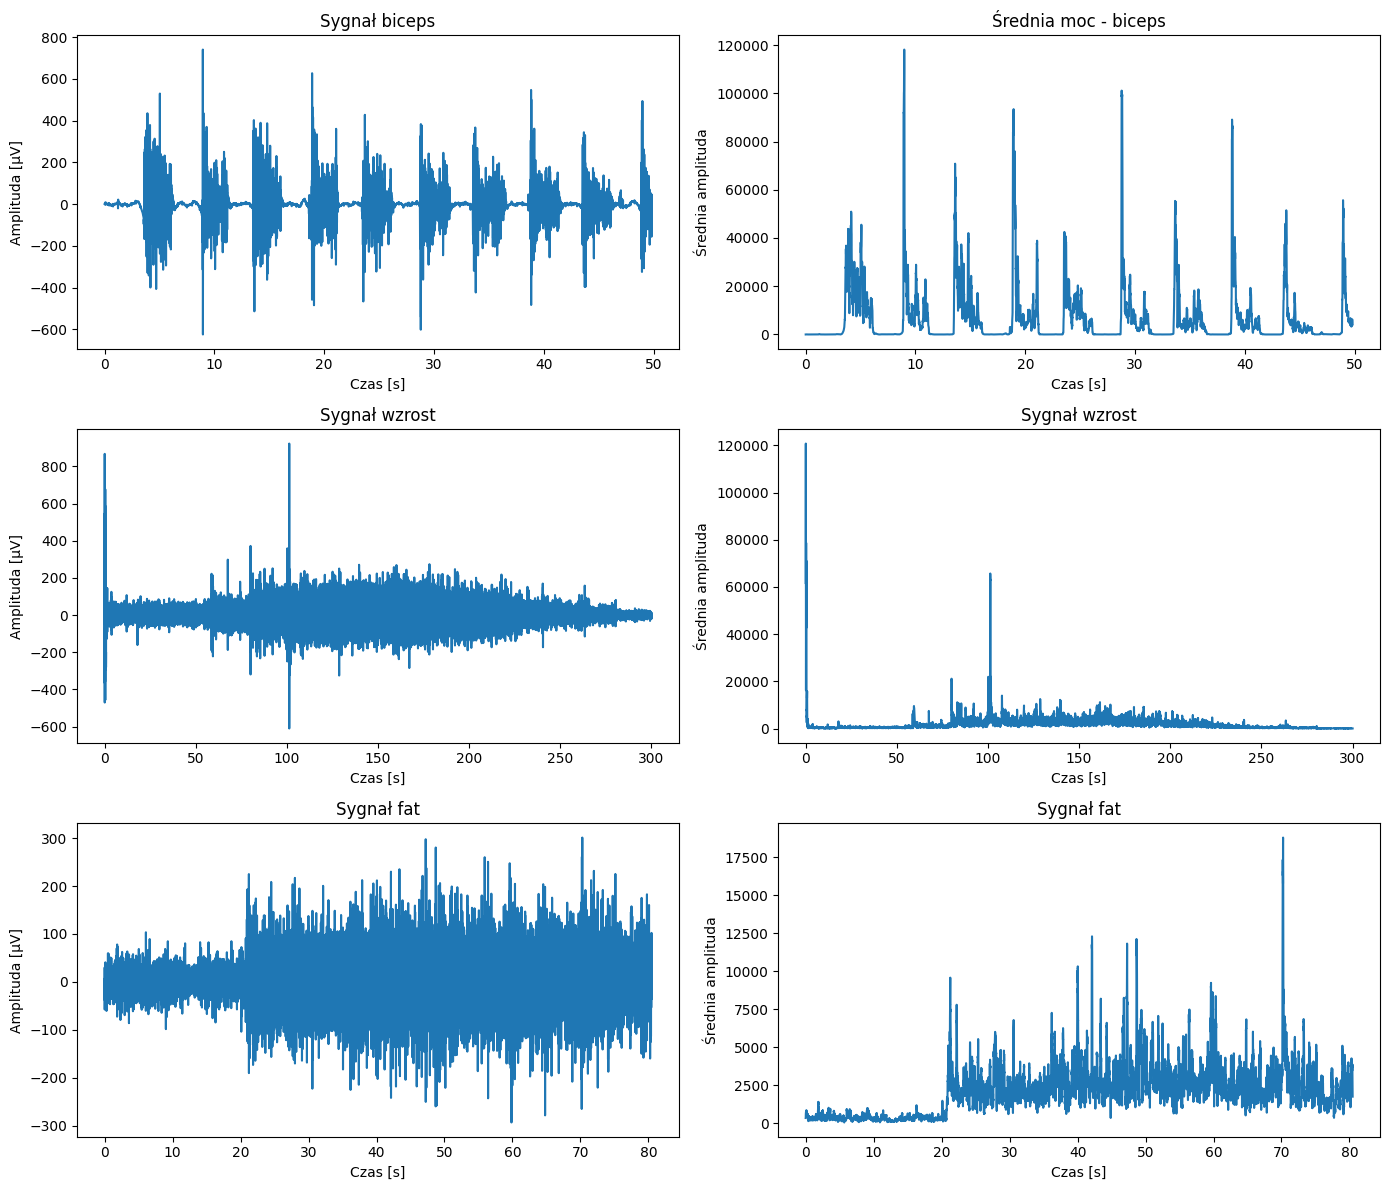

In [4]:
def wczytywanie(file_path):
    """Wczytuje dane EKG z pliku i zwraca trzy kanały."""
    data = np.fromfile(file_path, dtype="float32")
    return data

Fs1 = 128
Fs2 = 2048
napieciowy_bic = wczytywanie("Pom1_nap_bic.obci.raw").reshape(-1,2)
wzrost_marked = wczytywanie("Pom2_wzrost_marked.obci.raw").reshape(-1,2)
fat = wczytywanie("Pom3_fat.obci.raw").reshape(-1,2)

bic = napieciowy_bic[:,1]
marked = wzrost_marked[:,1]
fat1 = fat[:,1]

t_bic =np.arange(0,len(bic)/Fs1,1/Fs1)
t_marked = np.arange(0,len(marked)/Fs2, 1/Fs2)
t_fat = np.arange(0,len(fat1)/Fs2,1/Fs2)

def filtry(signal, Fs):

    sos_high = ss.butter(8, 0.67, fs=Fs, btype="high", output="sos")
    sos_low = ss.butter(2, 150, fs=Fs, btype="low", output="sos")
    b_notch, a_notch = ss.iirnotch(50, Q=30, fs=Fs)
    signal = ss.sosfiltfilt(sos_high, signal)
    signal = ss.sosfiltfilt(sos_low, signal)
    signal = ss.lfilter(b_notch, a_notch, signal)
    return signal*0.0715

def filtry1(signal, Fs):

    sos_high = ss.butter(8, 0.67, fs=Fs, btype="high", output="sos")
    b_notch, a_notch = ss.iirnotch(50, Q=30, fs=Fs)
    signal = ss.sosfiltfilt(sos_high, signal)
    signal = ss.lfilter(b_notch, a_notch, signal)
    return signal*0.0715

zfiltrowany_bic = filtry1(bic,Fs1)
zfiltrowany_marked = filtry(marked, Fs2)
zfiltrowany_fit = filtry(fat1,Fs2)

window_size_Fs1 = int(0.1 * Fs1)
window_size_Fs2 = int(0.1 * Fs2)

def biegnacasrednia(signal, window_size):
    squared_signal = signal**2
    window = np.ones(window_size) / window_size
    moving_avg_power = np.convolve(squared_signal, window, mode='same')

    return moving_avg_power

power_bic = biegnacasrednia(zfiltrowany_bic, window_size_Fs1)
power_marked = biegnacasrednia(zfiltrowany_marked, window_size_Fs2)
power_fat = biegnacasrednia(zfiltrowany_fit, window_size_Fs2)

fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Biceps
axs[0, 0].plot(t_bic, zfiltrowany_bic)
axs[0, 0].set_title("Sygnał biceps")
axs[0, 0].set_xlabel("Czas [s]")
axs[0, 0].set_ylabel("Amplituda [μV]")

axs[0, 1].plot(t_bic, power_bic)
axs[0, 1].set_title("Średnia moc - biceps")
axs[0, 1].set_xlabel("Czas [s]")
axs[0, 1].set_ylabel("Średnia amplituda")

# Wzrost marked
axs[1, 0].plot(t_marked, zfiltrowany_marked)
axs[1, 0].set_title("Sygnał wzrost")
axs[1, 0].set_xlabel("Czas [s]")
axs[1, 0].set_ylabel("Amplituda [μV]")

axs[1, 1].plot(t_marked, power_marked)
axs[1, 1].set_title("Sygnał wzrost")
axs[1, 1].set_xlabel("Czas [s]")
axs[1, 1].set_ylabel("Średnia amplituda")

# Fat
axs[2, 0].plot(t_fat, zfiltrowany_fit)
axs[2, 0].set_title("Sygnał fat")
axs[2, 0].set_xlabel("Czas [s]")
axs[2, 0].set_ylabel("Amplituda [μV]")

axs[2, 1].plot(t_fat, power_fat)
axs[2, 1].set_title("Sygnał fat")
axs[2, 1].set_xlabel("Czas [s]")
axs[2, 1].set_ylabel("Średnia amplituda")

plt.tight_layout()
plt.show()


# **ĆWICZENIE 2**
## Algorytm detektora aktywności mięśnia
Następnie zaproponowano detektor aktywności mięśnia przy pobieraniu sygnału dotyczącego aktywności zaciśnięcia bicepsu

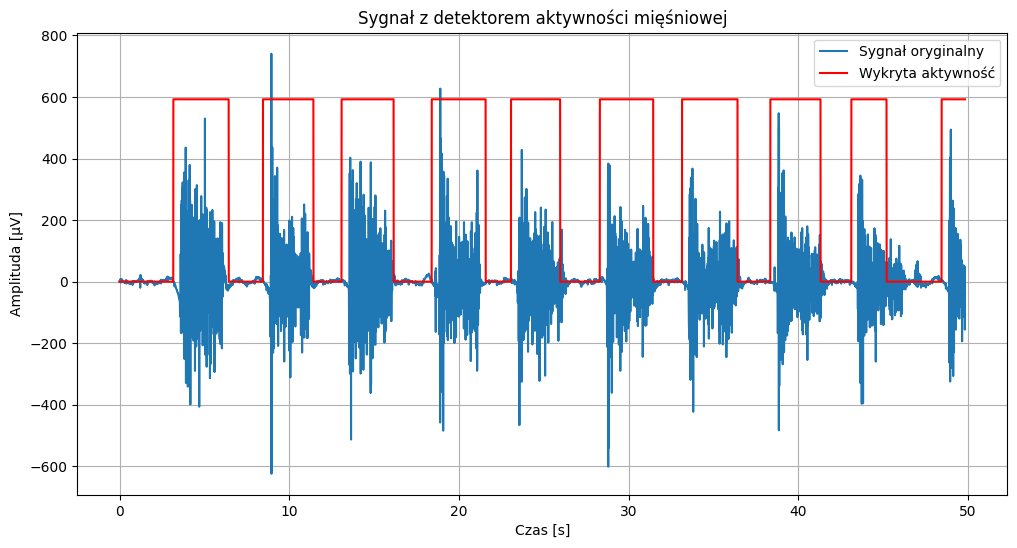

In [5]:
def detektor_aktywności(sygnał, Fs=128, próg=50, filtr_medianowy=101):

    T = len(sygnał) / Fs
    t = np.arange(0, T, 1/Fs)
    moc_sygnału = biegnacasrednia(sygnał, Fs)
    syg = np.sqrt(moc_sygnału)

    # Zastosowanie progu detekcji
    detekcja = np.zeros_like(syg)
    detekcja[syg >= próg] = 1
    detekcja[syg < próg] = 0
    detekcja = ss.medfilt(detekcja, filtr_medianowy)

    plt.figure(figsize=(12, 6))
    plt.plot(t, sygnał, label='Sygnał oryginalny')
    plt.plot(t, detekcja * max(abs(sygnał)) * 0.8, 'r-', label='Wykryta aktywność')
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda [μV]')
    plt.title('Sygnał z detektorem aktywności mięśniowej')
    plt.legend()
    plt.grid(True)
    plt.show()

    return t, detekcja

t_bic_det, bic_aktywność = detektor_aktywności(zfiltrowany_bic, Fs=Fs1)



# **ĆWICZENIE 3**
## Zbadanie zależność parametrów sygnału EMG od obciązenia mięśnia

W tym ćwiczeniu przeprowadzono analize sygnału ze wzrastającym obciążeniem mięśnia. Na poczatku przedstawiono wykres  średniej amplitudy (odchylenia standardowego) od obciążenia

Unikalne wartości markerów: [-2.1474836e+09 -6.6483600e+05 -6.0400200e+05 ...  2.0882540e+06
  2.1030910e+06  2.1257250e+06]
Znaleziono 11 markerów o wartości > 1913152.5
Finalna liczba markerów: 11
Pozycje markerów: [19146, 103889, 163323, 204918, 245342, 286162, 367887, 409212, 449339, 490619, 531689]


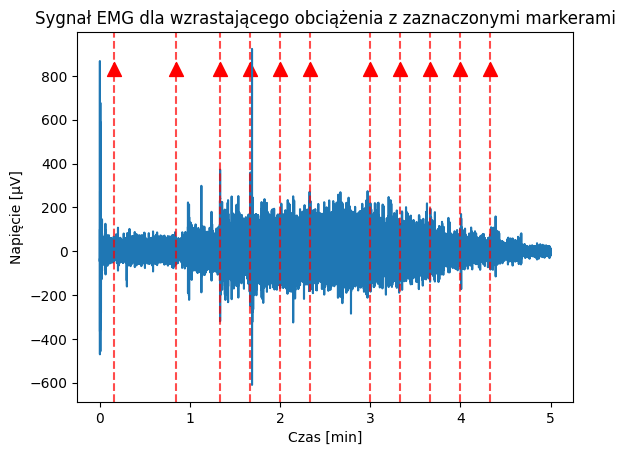

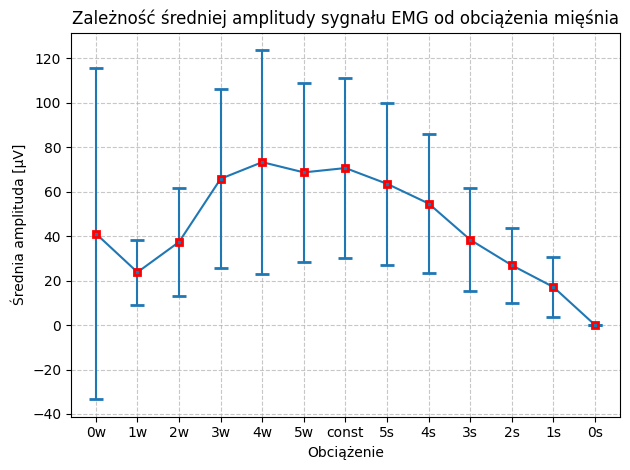


Zależność parametrów sygnału EMG od obciążenia mięśnia:
Obciążenie | Średnia amplituda | Odchylenie standardowe
--------------------------------------------------
    0w     |     41.1184      |        74.5005        
    1w     |     23.7544      |        14.5503        
    2w     |     37.3590      |        24.1649        
    3w     |     65.7666      |        40.2433        
    4w     |     73.2472      |        50.3126        
    5w     |     68.6450      |        40.2004        
  const    |     70.6020      |        40.5189        
    5s     |     63.5061      |        36.3680        
    4s     |     54.6465      |        31.0412        
    3s     |     38.3383      |        23.1962        
    2s     |     26.8725      |        16.8860        
    1s     |     17.0885      |        13.3314        
    0s     |      0.0000      |         0.0000        


In [6]:
#Ponownie wprowadzam analize sygnału wzrost

marked = wzrost_marked[:,1]  # Sygnał EMG
markers = wzrost_marked[:,0]  # Kanał markerów
t_marked = np.arange(0, len(marked)/Fs2, 1/Fs2)  # Oś czasu
sygobc = filtry(marked, Fs2)

# Debugowanie - sprawdzenie wartości markerów
unique_markers = np.unique(markers)
print("Unikalne wartości markerów:", unique_markers)

# Dostosowanie wyszukiwania markerów
if 300 in unique_markers:
    # Znajdowanie indeksów markerów
    indexy = []
    for i in range(len(markers)):
        if markers[i] == 300:
            if len(indexy) == 0 or (i - indexy[-1]) > 10000:
                indexy.append(i)
    print(f"Znaleziono {len(indexy)} markerów o wartości 300")
else:
    max_marker_value = np.max(markers)
    if max_marker_value > 0:
        threshold = max_marker_value * 0.9
        indexy = []
        for i in range(len(markers)):
            if markers[i] > threshold:
                if len(indexy) == 0 or (i - indexy[-1]) > 10000:
                    indexy.append(i)
        print(f"Znaleziono {len(indexy)} markerów o wartości > {threshold}")
    else:
        # Jeśli nie ma wyraźnych markerów, dzielimy sygnał na równe części
        print("Nie znaleziono wyraźnych markerów. Dzielenie sygnału na równe części.")
        num_segments = 13  # Zgodnie z liczbą obciążeń
        segment_length = len(sygobc) // num_segments
        indexy = [i * segment_length for i in range(1, num_segments)]

# Sprawdzamy czy mamy wystarczającą liczbę markerów
if len(indexy) < 2:
    print("Za mało markerów. Dzielenie sygnału na równe części.")
    num_segments = 13
    segment_length = len(sygobc) // num_segments
    indexy = [i * segment_length for i in range(1, num_segments)]

print(f"Finalna liczba markerów: {len(indexy)}")
print(f"Pozycje markerów: {indexy}")

# Usuwanie niepotrzebnych markerów (tylko jeśli jest ich więcej niż 2)
if len(indexy) > 12:  # Sprawdzamy czy mamy więcej markerów niż potrzebujemy
    # Zostawiamy tylko 12 markerów (13 obciążeń wymaga 12 granic)
    step = len(indexy) // 12
    indexy = indexy[::step][:12]
    print(f"Ograniczono do {len(indexy)} markerów")

# Wizualizacja sygnału z markerami
plt.plot(t_marked/60, sygobc)
for idx in indexy:
    plt.axvline(x=t_marked[idx]/60, color='r', linestyle='--', alpha=0.7)
plt.scatter(t_marked[indexy]/60, np.ones_like(indexy)*np.max(sygobc)*0.9, color='red', marker='^', s=100)
plt.ylabel('Napięcie [μV]')
plt.xlabel('Czas [min]')
plt.title('Sygnał EMG dla wzrastającego obciążenia z zaznaczonymi markerami')
plt.show()

# Podział sygnału na fragmenty
def na_fragmenty(sygobc, t, indexy):
    # Dzielę sygnał na fragmenty
    sygparts = []
    ts = []

    # Pierwszy fragment (od początku do pierwszego markera)
    sygparts.append(sygobc[:indexy[0]])
    ts.append(t[:indexy[0]])

    # Środkowe fragmenty
    for i in range(1, len(indexy)):
        sygparts.append(sygobc[indexy[i-1]:indexy[i]])
        ts.append(t[indexy[i-1]:indexy[i]])

    # Ostatni fragment (od ostatniego markera do końca)
    sygparts.append(sygobc[indexy[-1]:])
    ts.append(t[indexy[-1]:])

    return sygparts, ts

obcs = ['0w','1w','2w','3w','4w','5w','const','5s','4s','3s','2s','1s','0s']

# Obliczanie średniej amplitudy i odchylenia standardowego
def sramplt(sygobc, t, indexy, obcs, plot_ampl=False, plot_result=True):
    # Wyciągam amplitudę chwilową używając transformaty Hilberta
    sygobc_ampl = np.abs(ss.hilbert(sygobc))

    # Dzielę sygnał na fragmenty
    sygparts, ts = na_fragmenty(sygobc_ampl, t, indexy)

    # Obliczam średnie i odchylenia standardowe
    stats = np.zeros((len(obcs), 2))
    for i in range(len(sygparts)):
        if i < len(obcs):  # Upewniamy się, że mamy odpowiednie obciążenie dla tego fragmentu
            stats[i] = np.array([np.mean(sygparts[i]), np.std(sygparts[i])])

    if plot_result:
        plt.errorbar(obcs, stats[:,0], yerr=stats[:,1], marker='s', ms=5, mew=2, mec='red', color='tab:blue', capsize=5)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.ylabel('Średnia amplituda [μV]')
        plt.xlabel('Obciążenie')
        plt.title('Zależność średniej amplitudy sygnału EMG od obciążenia mięśnia')
        plt.tight_layout()
        plt.show()

    return stats

# Wyznaczenie statystyk i wykreślenie wyników
try:
    sygparts, ts = na_fragmenty(sygobc, t_marked, indexy)
    stats = sramplt(sygobc, t_marked, indexy, obcs, plot_ampl=True, plot_result=True)

    # Wyświetlenie wartości liczbowych
    print("\nZależność parametrów sygnału EMG od obciążenia mięśnia:")
    print("Obciążenie | Średnia amplituda | Odchylenie standardowe")
    print("-" * 50)
    for i, obc in enumerate(obcs):
        if i < len(stats):
            print(f"{obc:^10} | {stats[i,0]:^16.4f} | {stats[i,1]:^22.4f}")
except Exception as e:
    print(f"Wystąpił błąd: {e}")

    # Alternatywne podejście w przypadku błędu - segmentacja na równe części
    print("\nPróba alternatywnej analizy - podział na równe fragmenty...")

    num_segments = len(obcs)
    segment_length = len(sygobc) // num_segments
    alternative_indexy = [i * segment_length for i in range(1, num_segments)]

    sygparts, ts = na_fragmenty(sygobc, t_marked, alternative_indexy)
    stats = sramplt(sygobc, t_marked, alternative_indexy, obcs, plot_ampl=True, plot_result=True)

## Widmo Welch dla poszczególnych fragmentów sygnału

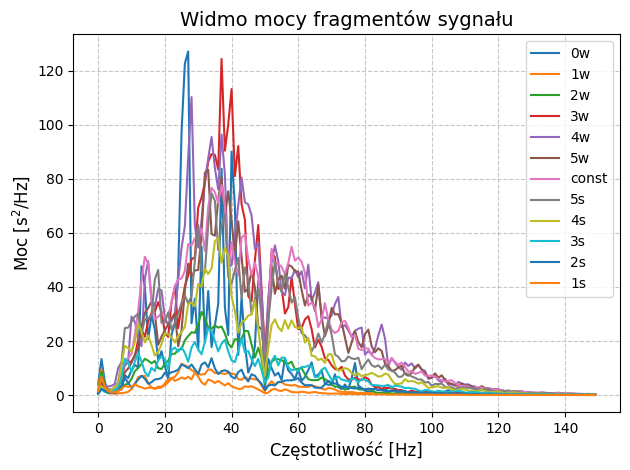

In [7]:
def widmo_welch(signals, labels, sampling_rate=2048):
    max_freq_idx = 150

    for signal, label in zip(signals, labels):
        frequencies, power_spectrum = ss.welch(
            signal,
            fs=sampling_rate,
            nperseg=sampling_rate,
            scaling="density"
        )

        plt.plot(frequencies[:max_freq_idx], power_spectrum[:max_freq_idx], label=label)

    plt.title('Widmo mocy fragmentów sygnału', fontsize=14)
    plt.xlabel('Częstotliwość [Hz]', fontsize=12)
    plt.ylabel('Moc [s$^{2}$/Hz]', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

widmo_welch(sygparts, obcs)

W dalszej częsci raportu zaimportowano funkcje w celu stworzenia spektogramu oraz scalogramu


In [8]:
def TFRPlot(TFR, t_mapy, f_mapy, sig, Fs=128, title =''):
    '''
    Funkcja do rysowania map czas-częstość z sygnałem zaprezentowanym poniżej
    TFR - mapa czas-częstość (time-freqyency representation
    t_mapy, f_mapy - wektory reprezentujące osie czasu i częstości
    sig - sygnał do wyrysowania pod mapą (np. ten, z którego powstała mapa)
    Fs - częstość próbkowania sygnału
    title - tytuł do wyświetlenia ponad mapą
    '''
    df = f_mapy[1] - f_mapy[0]
    dt = t_mapy[1] - t_mapy[0]
    t = np.arange(0, len(sig)) / Fs
    sygAxes = plt.axes([0.05, 0.05, 0.8, 0.1])  # tworzymy osie do rysowania sygnału
    tfAxes = plt.axes([0.05, 0.15, 0.8, 0.8])  # tworzymy osie do rysowania mapy

    # wykreślam sygnał
    sygAxes.plot(t, sig)
    plt.setp(sygAxes, xlim=(t_mapy.min(), t_mapy.max()))
    sygAxes.set_xlabel('t [s]')
    sygAxes.set_ylabel('A [$_{\mu}$V]')

    # wyświetlam mapę
    tfAxes.imshow(TFR,aspect='auto', origin='lower', interpolation='nearest',
                  extent=(t_mapy.min(), t_mapy.max(), f_mapy.min(), f_mapy.max()))
    plt.setp(tfAxes, xticklabels=[])
    plt.title(title)
    tfAxes.set_ylabel('f [Hz]')
    plt.show()

def spektrogram(x, okno, trans , Fs, fmax):
    Nx = len(x)
    No = len(okno)
    okno = okno / np.linalg.norm(okno)
    pozycje_okna = np.arange(0, Nx, trans)
    t = pozycje_okna / Fs
    N_trans = len(pozycje_okna)
    f = np.fft.rfftfreq(No, 1 / Fs)
    P = np.zeros((len(f), N_trans)) #możliwe częstości x liczba pozycji w których ustawimy okienko
    z = np.zeros(int(No / 2)) #dopełniamy sygnał zerami żeby móc okienkować od początku
    sig = np.concatenate((z, x, z))
    for i, poz in enumerate(pozycje_okna):  # iterujemy po możliwych pozycjach okna
        s = sig[poz:poz + No]  # pobierz wycinek sygnału o długości okna i rozpoczynający się w aktualnej pozycji okna
        s = s * okno
        S = np.fft.rfft(s)  # oblicz rzeczywistą transformatę zokienkowanego sygnału
        P_tmp = S * S.conj()  # obliczam moc
        P_tmp = P_tmp.real / Fs
        if len(s) % 2 == 0:  # dokładamy moc z ujemnej części widma
            P_tmp[1:-1] *= 2
        else:
            P_tmp[1:] *= 2
        P[:,i] = P_tmp
    if fmax is not None: #dokładam ograniczenie częstotliwości
        idx_max = np.where(f <= fmax)[0]
        if len(idx_max) > 0:
            max_idx = idx_max[-1] + 1
            f = f[:max_idx]
            P = P[:max_idx, :]
    return t, f, P

def skalogram(x,  w=7.0, MinF = 1.0 ,MaxF = 64, df=1.0, Fs=128.):
    '''
    x - sygnał
    w - parametr falki Morleta,
      wiąże się z jej częstością centralną i skalą w nastąpujący sposób:
      f = 2*s*w / T
      gdzie: s-skala,  T-długość sygnału w sek.

    MinF,MaxF - częstości pomiędzy którymi ma być liczony skalogram
    df - odstęp pomiędzy częstościami
    Fs - częstość próbkowania
    '''
    T= len(x)/Fs
    M = len(x)
    t = np.arange(0,T,1./Fs)
    freqs = np.arange(MinF,MaxF,df)
    P = np.zeros((len(freqs),M))
    X = np.fft.fft(x)
    for i,f in enumerate(freqs):
        s = T*f/(2*w)
        xx = np.linspace(-s * 2 * np.pi, s * 2 * np.pi, M)
        psi = np.exp(1j * w * xx) * np.exp(-0.5 * (xx**2)) * np.pi**(-0.25) #falka ze skalą odpowiadajacą częstości f
        Psi = np.fft.fft(psi)# transformata falki
        Psi /= np.sqrt(np.sum(Psi*Psi.conj()))  # normalizujemy transformatę falki
        tmp = np.fft.fftshift(np.fft.ifft(X*Psi)) # liczymy odwrotną transformatę od iloczynu transformaty sygnału i transformaty flaki,
                                                   # czyli liczymy splot sygnału i falki w dziedzinie czasu
        P[i,:] = (tmp*tmp.conj()).real # liczymy moc tego splotu
    return t, freqs, P


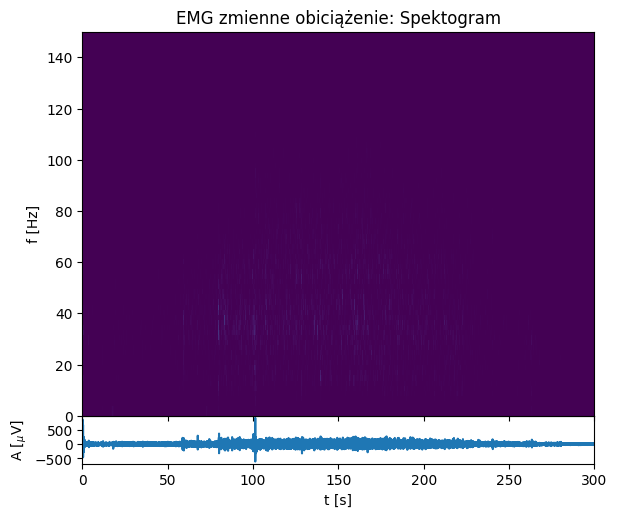

In [9]:
#spektrogram
Nokna = 1024
h= ss.windows.blackman(Nokna) # okienko
t_mapy, f_mapy, TFR = spektrogram(sygobc, h, trans=1 , Fs = 2048,fmax = 150)
TFRPlot(TFR, t_mapy, f_mapy, sygobc, Fs=2048,title ='EMG zmienne obiciążenie: Spektogram')

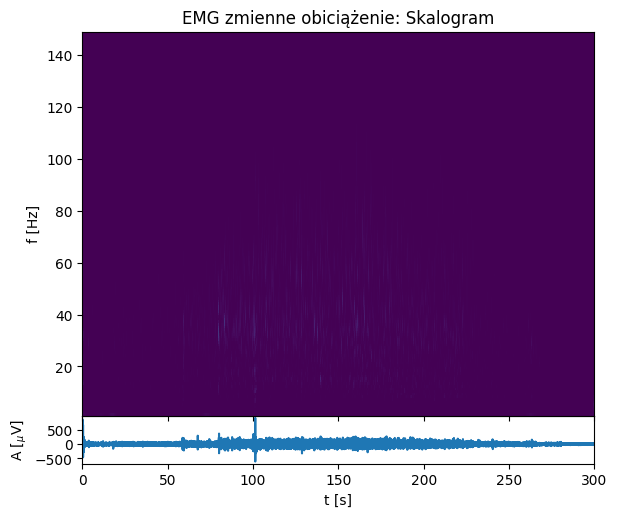

In [10]:
# skalogram
w=14
t_mapy, f_mapy, TFR = skalogram(sygobc, w= w, MinF = 1.0, MaxF = 150, df=1.0, Fs=2048)
TFRPlot(TFR, t_mapy, f_mapy, sygobc, Fs= 2048,title ='EMG zmienne obiciążenie: Skalogram')

Porównując spektogram z scalogramem nie zauważono dużych różnic w ich reprezentacjach czas-częstość

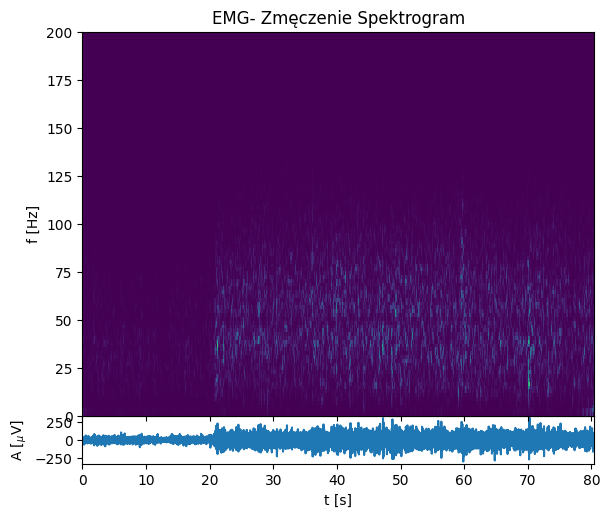

In [11]:
#spektrogram sygnału zmęczenia
Nokna = 1024
h= ss.windows.blackman(Nokna) # okienko
t_mapy, f_mapy, TFR = spektrogram(zfiltrowany_fit, h, trans=1 , Fs = 2048,fmax=200)
TFRPlot(TFR, t_mapy, f_mapy, zfiltrowany_fit, Fs=2048,title ='EMG- Zmęczenie Spektrogram')

Powyżej przedstawiono mapę czas częstość dla całego czasu rejestracji sygnału EMG od zmęczenia mięśnia. W porównaniu z poprzednimi mapami czas-częstość widać wyraźną różnice w zakresie częstotliwości oraz w ich nasileniu.

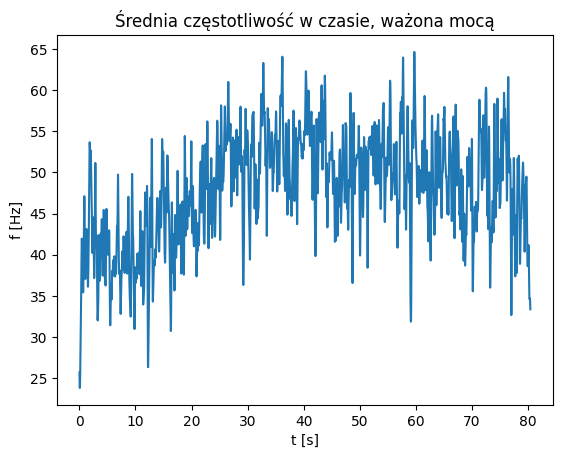

In [12]:
def wazeniemocami(TFR,t,f):
  todivide = np.sum(TFR,axis=0)
  values = TFR.T@f_mapy
  values /= todivide
  plt.plot(t,values)
  plt.xlabel('t [s]')
  plt.ylabel('f [Hz]')
  plt.title('Średnia częstotliwość w czasie, ważona mocą')
  plt.show()

wazeniemocami(TFR,t_mapy,f_mapy)

# **ĆWICZENIE 4**
W tym ćwiczeniu pobrano sygnały przedstawiające zdrowy sygnał EMG oraz sygnały z poszczególnymi patologiami tj. miopatią oraz neuropatią

In [13]:
gdown.download_folder('https://drive.google.com/drive/u/1/folders/1CKvd3o5ylWRXYcEza3mnhpL0hXHcdivi')

Retrieving folder contents


Processing file 1C8AfUOGlYx99ezyltY43cKmlv32nXJbJ miopatia.bin
Processing file 1s1bCJ4TORCrvGNAecGhv1sFE4JeWPEe8 neuropatia.bin
Processing file 1GvEq-IXrdC-faQl06RNr9MuxNAEETqAk zdrowy.bin


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1C8AfUOGlYx99ezyltY43cKmlv32nXJbJ
To: /content/dane_do_MEG/miopatia.bin
100%|██████████| 883k/883k [00:00<00:00, 93.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1s1bCJ4TORCrvGNAecGhv1sFE4JeWPEe8
To: /content/dane_do_MEG/neuropatia.bin
100%|██████████| 1.18M/1.18M [00:00<00:00, 127MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GvEq-IXrdC-faQl06RNr9MuxNAEETqAk
To: /content/dane_do_MEG/zdrowy.bin
100%|██████████| 407k/407k [00:00<00:00, 88.1MB/s]
Download completed


['/content/dane_do_MEG/miopatia.bin',
 '/content/dane_do_MEG/neuropatia.bin',
 '/content/dane_do_MEG/zdrowy.bin']

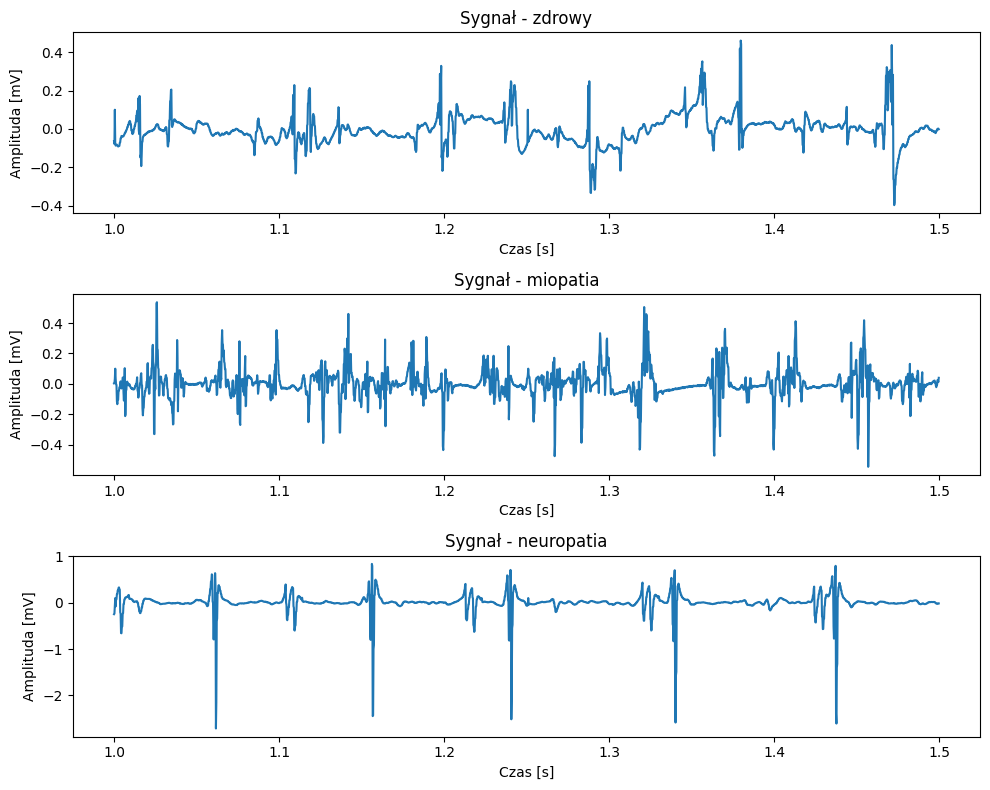

In [14]:
zdrowy = np.fromfile('dane_do_MEG/zdrowy.bin',dtype='float64')
miopatia = np.fromfile('dane_do_MEG/miopatia.bin',dtype='float64')
neuropatia = np.fromfile('dane_do_MEG/neuropatia.bin',dtype='float64')
Fs = 4000
tzdr = np.arange(0,len(zdrowy)/Fs,1/Fs)
tmio = np.arange(0,len(miopatia)/Fs,1/Fs)
tneuro = np.arange(0,len(neuropatia)/Fs,1/Fs)

plt.figure(figsize= (10,8))

plt.subplot(3,1,1)
plt.plot(tzdr[4000:6000], zdrowy[4000:6000])
plt.title("Sygnał - zdrowy")
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda [mV]")

plt.subplot(3,1,2)
plt.plot(tmio[4000:6000], miopatia[4000:6000])
plt.title("Sygnał - miopatia")
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda [mV]")

plt.subplot(3,1,3)
plt.plot(tneuro[4000:6000], neuropatia[4000:6000])
plt.title("Sygnał - neuropatia")
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda [mV]")


plt.tight_layout()
plt.show()


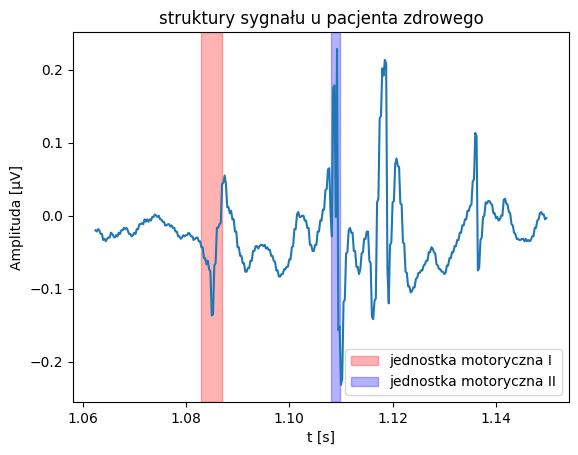

In [15]:
fig, ax1 = plt.subplots()
ax1.plot(tzdr[4250:4600], zdrowy[4250:4600])
plt.title("struktury sygnału u pacjenta zdrowego")
plt.ylabel('Amplituda [μV]')
plt.xlabel('t [s]')
ax1.axvspan(1.083, 1.087, alpha=0.3, color='red', label='jednostka motoryczna I')
ax1.axvspan(1.108, 1.1099, alpha=0.3, color='blue', label='jednostka motoryczna II')
ax1.legend()

plt.show()

W ogólności widać, że zapis sygnału jest stosunkowo gładki, bez nadmiaru drobnych, niskich skoków potenciału(miopatia), lub olbrzymich, wydłużonych potencjałów(neuropatia)

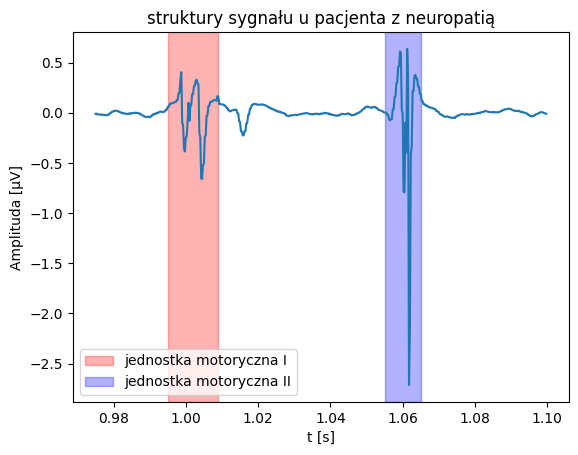

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(tneuro[3900:4400],neuropatia[3900:4400])
plt.title("struktury sygnału u pacjenta z neuropatią")
plt.ylabel('Amplituda [μV]')
plt.xlabel('t [s]')
ax1.axvspan(0.995, 1.009, alpha=0.3, color='red', label='jednostka motoryczna I')
ax1.axvspan(1.055, 1.065, alpha=0.3, color='blue', label='jednostka motoryczna II')
ax1.legend()
plt.show()

Neuropatia to patologia polegająca na zmianach w nerwie tj. uszkodzenie aksonów co prowadzi do utracenia części jednostki motorycznej co skutkuje w częściach unerwionych brak sygnału, a w reszcie wysokie skoki amplitudy potencjału motorycznego. W przypadku pacjenta z neuropatią można zauważyć bardzo wysokie amplitudy, wydłużony czas trwania potencjału jednostki motorycznej oraz długie przerwy pomiędzy kolejnymi potencjałami.

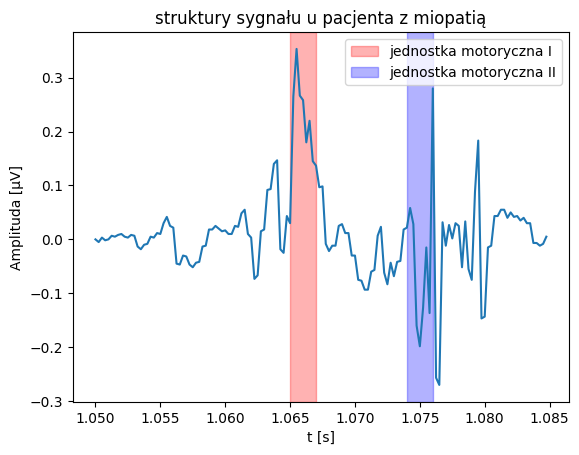

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(tmio[4200:4340],miopatia[4200:4340])
plt.title("struktury sygnału u pacjenta z miopatią")
plt.ylabel('Amplituda [μV]')
plt.xlabel('t [s]')
ax1.axvspan(1.065, 1.067, alpha=0.3, color='red', label='jednostka motoryczna I')
ax1.axvspan(1.074, 1.076, alpha=0.3, color='blue', label='jednostka motoryczna II')
plt.legend()
plt.show()

Miopatia to patologia polegająca na zmianach w mięśniu, konkretniej np. degeneracja luz utrata włókień mieśniowych co w rezultacje powoduje, że potencjał jednostki motorycznej obejmuje mniej włokien. U pacjenta z miopatią można zauważyć, niższe i weższe potencjały jednostki motorycznej